In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

house_df = pd.read_csv('kc_house_data.csv')

## 1. Linear Regression. A bit of formalism

Let's have a data consisting of $n$ samples. These samples are $(m+1)$ - dimensional vectors, where first $m$ dimensions are called features (explanatory variables) and will be used to predict the last dimension which is called regressand (dependent variable). 

We will have therefore a $n \times m$ matrix **$X$** (called feature matrix) and vector **$y$** of lenght $n$. 

In our simple example, living squarefeet is a feature, house's price is regressand and the data consists of $100$ samples. It forms $100 \times 1$ feature matrix **$X$** and vector **$y$** of length $100$.

In [ ]:
X = house_df.sqft_living.values.reshape(-1,1)[:100]
y = house_df.price.values.reshape(-1,1)[:100]
print(np.shape(X))
print(np.shape(y))

(100, 1)
(100, 1)


Linear regression approach tries to find a vector **$b$** which minimizes the cost function 

$$f_{y}(b) = \dfrac{|Xb - y|^2}{n}, $$

where **$|\cdot|$** is euclidean norm and **$Xb$** is simple matrix multiplication (vector is also a matrix). 

Geometrically (and roughly) speaking, we are determining a line which minimizes the cumulative distance to all the points. 

When such a vector **$b$** is found, we can predict values **$y$** for given features **$X$** by calculating **$Xb$**. We have therefore 

$$y_{pred} = Xb, \\ f_{y}(b) = \dfrac{|y_{pred} - y|^2}{n}. $$

## Exercise 1
a) Create functions *predict(b, X)* and *cost(y_pred, y_true)* implementing theory above.  All inputs should be numpy arrays (take care of dimension scalability!)  
b) For our data **$X,y$**, plot cost as the function of **$b$** (which is one dimensional vector). Plot the line with best slope among  evaluated with *cost* function.

In [ ]:
#a)'
# Cost function 

from numpy.linalg import norm

# I created function which allow predict y values.
def predict(b, X):
    return np.dot(X,b)

# It is cost function, sometimes called mean squared error.
def cost(y_pred, y_true):
    return round((norm((y_pred-y_true).reshape(-1)))**2/len(y_pred),2)



#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(predict(test_b, test_X))
print(cost(predict(test_b, test_X),test_y))


# Output is as expected.

[[ 6]
 [11]
 [12]
 [16]]
82.75


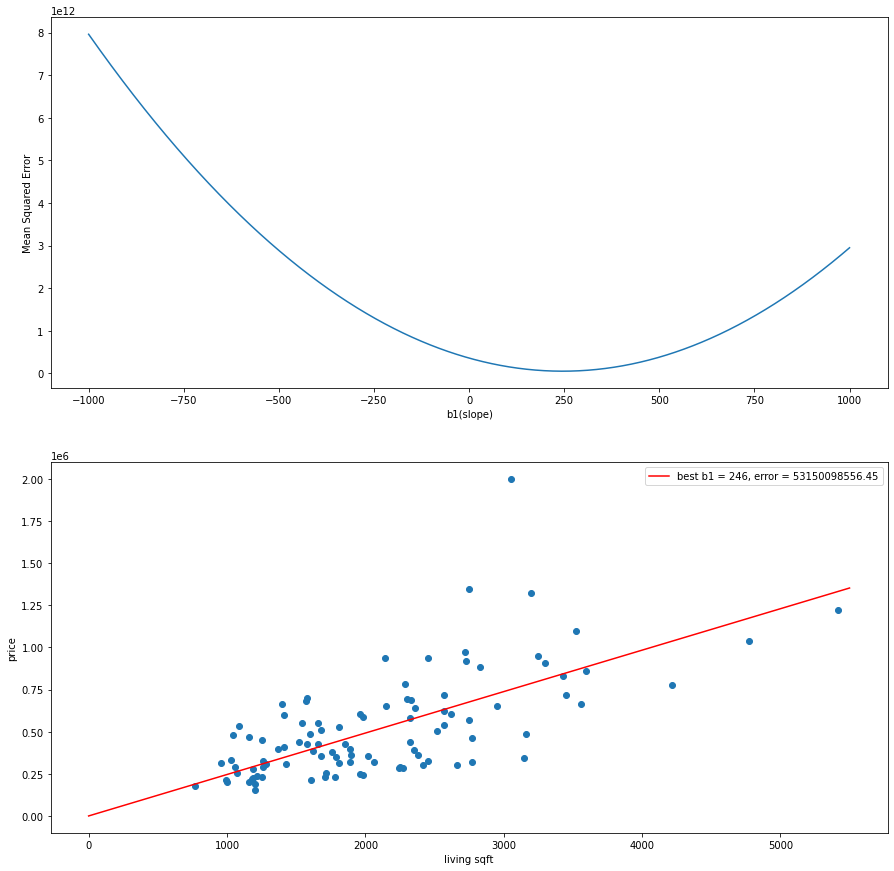

In [ ]:
#b)

# I created b values for cost function
vector_bvalues = range(-1000,1001)

mse = []
b_value = []

# I counted cost function(mean squared error) for X and y using each b values for prediction and cost function.
for i in vector_bvalues:
  cost_value = cost(predict(i,X),y)
  mse.append(cost_value)
  b_value.append(i)


# From array which contains error I choose minimal error. 
# Then I found out its index.
min_mse = min(mse)
index_min = mse.index(min_mse)

# Next I got b value for which mean squared error is the least and
# counted line function which can be used for prediction price depends on living sqft.
x_value = np.linspace(0,5500,100)

line = b_value[index_min]*x_value

figure, axis = plt.subplots(2,figsize=(15,15))

# Creating plot of b values and mean squared error
axis[0].plot(b_value,mse)
axis[0].set_xlabel('b1(slope)')
axis[0].set_ylabel('Mean Squared Error')

# Creating plot of living sqft and price, and also the best prediction for them using the best 
axis[1].scatter(X,y)
axis[1].plot(x_value,line,color='red',label='best b1 = ' + str(b_value[index_min]) + ',' + ' error = ' + str(min_mse))
axis[1].set_xlabel('living sqft')
axis[1].set_ylabel('price')
axis[1].legend()

plt.show()


# From the first plot, I can see that mean squared error counted by cost() (for each b slope) decreases up to about b equals 250 and then this error increases.
# From the next plot, I find out that b value for which error is the smallest is equal 246.
# So I can see line which is the best price prediction depends on living sqft. 

# 2. Bias

The line above has limitation of crossing point (0,0). As on our data it doesn't seem harmful, let us check how our model would perform, if all $y$ were shifted by some constant. The interpretation is as follows: the goverment has imposed a new tax in the set amount of 1 million dollar on buying new houses.

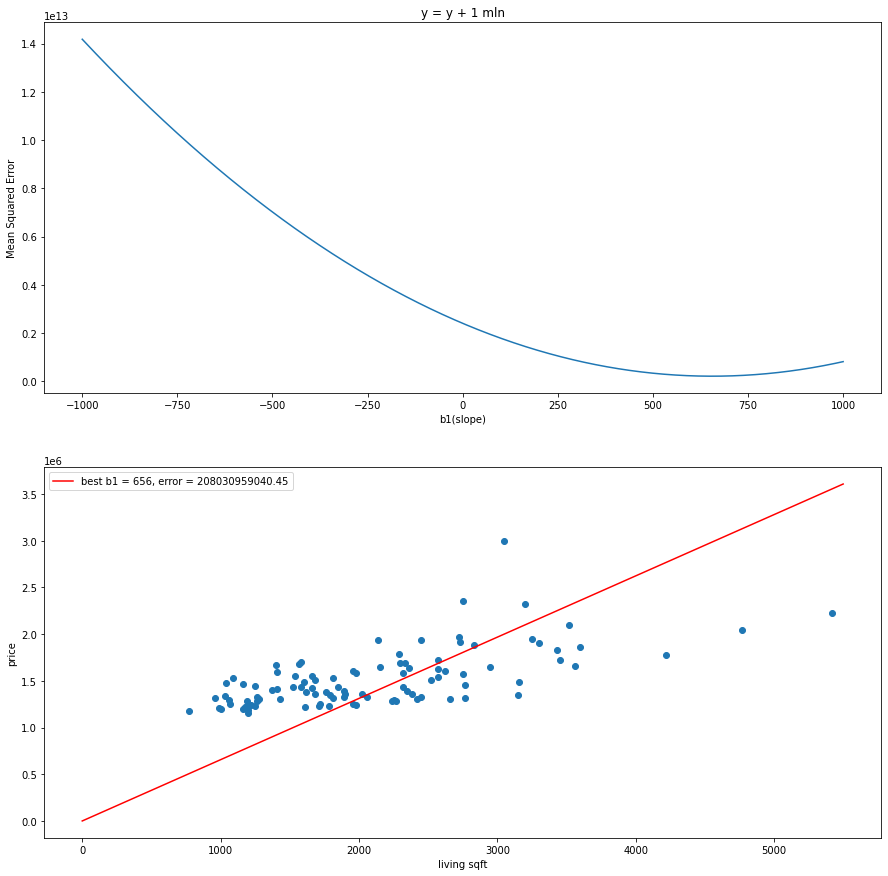

In [ ]:
y_shifted = house_df.price.values.reshape(-1,1)[:100]

for i in range(0,len(y_shifted)):
  y_shifted[i] += 1000000


# I created b values for cost function
vector_bvalues = range(-1000,1001)

mse = []
b_value = []

# I counted cost function(mean squared error) for X and y using each b values for prediction and cost function.
for i in vector_bvalues:
  cost_value = cost(predict(i,X),y_shifted)
  mse.append(cost_value)
  b_value.append(i)


# From array which contains error I choose minimal error. 
# Then I found out its index.
min_mse = min(mse)
index_min = mse.index(min_mse)

# Next I got b value for which mean squared error is the least and
# counted line function which can be used for prediction price depends on living sqft.
x_value = np.linspace(0,5500,100)

line = b_value[index_min]*x_value

figure, axis = plt.subplots(2,figsize=(15,15))

# Creating plot of b values and mean squared error
axis[0].plot(b_value,mse)
axis[0].set_xlabel('b1(slope)')
axis[0].set_ylabel('Mean Squared Error')
axis[0].set_title('y = y + 1 mln')

# Creating plot of living sqft and price, and also the best prediction for them using the best b values
axis[1].scatter(X,y)
axis[1].plot(x_value,line,color='red',label='best b1 = ' + str(b_value[index_min]) + ',' + ' error = ' + str(min_mse))
axis[1].set_xlabel('living sqft')
axis[1].set_ylabel('price')
axis[1].legend()

plt.show()

As we can see, for the best slope the error has grown almost by the factor of four. In addition we clearly see, that what limits us is indeed the constraint of all lines crossing point $(0,0)$.   

There are two basic solutions of this problem. One of them is centring of the data, that is substracting overall mean from all the values of given feature (or regressand).  

The other is adding bias term, which in this context (different than context discussed during the lectures!) may be understood as constant term in line equation. We simulate adding constant term to result of each prediction by appending artificial feature consisting of ones to **$X$** matrix and additional term to **$b$** vector.

## Exercise 2
a) Add bias column to the **$X$** matrix.  
b) Make the code below compatible with functions that you've created so far.

In [ ]:
#a)
# I created column with 100 rows and 1 column which is filled by 1.
bias_column = np.ones((100,1))

# I added bias column to data.
X_bias = np.hstack((X,bias_column))
print(X_bias[:10])
# Below I can see that data with bias are ready.

[[1.180e+03 1.000e+00]
 [2.570e+03 1.000e+00]
 [7.700e+02 1.000e+00]
 [1.960e+03 1.000e+00]
 [1.680e+03 1.000e+00]
 [5.420e+03 1.000e+00]
 [1.715e+03 1.000e+00]
 [1.060e+03 1.000e+00]
 [1.780e+03 1.000e+00]
 [1.890e+03 1.000e+00]]


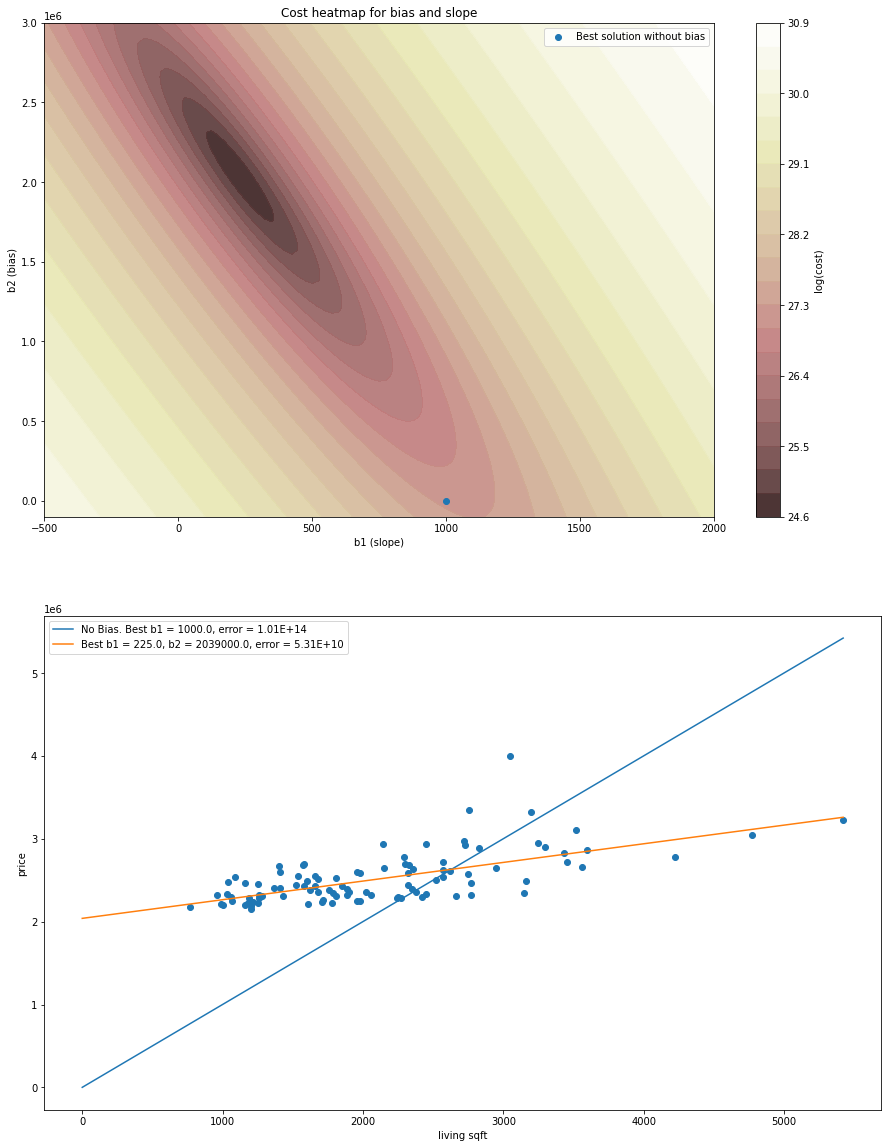

In [ ]:
#b)

# All I needed to do was changing name of X to X_bias in some places.

y_shifted = y+1e6

#No Bias Part
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)]
cost_arr = [cost(predict(b, X[:,0]), y_shifted) for b in b_arr]
best_b1 = b_arr[np.argmin(cost_arr)]


#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-500, 2000, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-1e5, 3e6, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix


# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_bias) , y_shifted)


plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
plt.scatter(best_b1, 0, label = "Best solution without bias")
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

plt.subplot(2,1,2)

plt.scatter(X_bias.T[0], y_shifted)
plt.xlabel("living sqft")
plt.ylabel("price")

x_model = np.linspace(np.min(X_bias), np.max(X_bias), 1000)
y_model = best_b1*x_model
plt.plot(x_model, y_model, label='No Bias. Best b1 = {}, error = {:.2E}'.format(best_b1, cost_arr[np.argmin(cost_arr)]))

best_b1_2d_ind, best_b2_2d_ind = np.unravel_index(cost_arr_2d.argmin(), cost_arr_2d.shape)
best_b1 = b_x[best_b1_2d_ind,best_b2_2d_ind]
best_b2 = b_y[best_b1_2d_ind,best_b2_2d_ind]

y_model = best_b1*x_model + best_b2
plt.plot(x_model, y_model, label='Best b1 = {}, b2 = {}, error = {:.2E}'.format(best_b1, best_b2, cost_arr_2d[best_b1_2d_ind,best_b2_2d_ind]))

plt.legend()

plt.show()


# Graph below shows error surfaces and the same color means the same value of error.
# From this I also find out error value for slope(b1) and bias(b2).
# According to the plot the best solution without bias isn't achive minimal error.


# The second plot shows how lines created with the best slope and bias look if I used bias for data or not.
# So I can see that the best fitting is for solution with bias. It means that I have the smallest error in prediction.
# The second line without bias isn't fit good to data.

**Adding bias improved error by three orders of magnitude. Not bad!**

# 3. Standardization

In order to improve performance of many machine learning algorithms, the value standardization is applied. It makes the values of each feature in the data have zero-mean and unit-variance. It is achieved by substracting from each value $x$ the overall mean $\bar{x}$, and then dividing it by feature's standard deviation ${\sigma}$:

$$x' = \frac{x - \bar{x}}{\sigma}. $$

It is important to remember, that bias column should not be standardize!

## Exercise 3
a) Implement function standardize(), which standardize the feature matrix and returns it together with two vectors containing original features' means and standard deviations.  
b) Implement function destandardize(), which restores the original data given standardized feature matrix X and vectors containing original features' means and standard deviations.  
c) Plot original $X,y$ data. Then plot it after standardization. Then plot it after destandardisation.

In [ ]:
#a)
# I created function which standarize my data. It means that they will be scaled down.
def standardize(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    return  (X-mean)/std,mean,std

#b)
# I created also function which allow data back to state before scalling.
def destandardize(X, means, sds):
    return X*sds+means

#short test:
W = [[1,2,3],[2,5,4],[3,4,5],[4,5,7]]
print(standardize(W))
x_prim,m,s = standardize(W)
print(destandardize(x_prim,m,s))
#Hint: with np.mean and np.std first function is three lines long. The second is one-liner.


# It looks that function work vell.

(array([[-1.34164079, -1.63299316, -1.18321596],
       [-0.4472136 ,  0.81649658, -0.50709255],
       [ 0.4472136 ,  0.        ,  0.16903085],
       [ 1.34164079,  0.81649658,  1.52127766]]), array([2.5 , 4.  , 4.75]), array([1.11803399, 1.22474487, 1.47901995]))
[[1. 2. 3.]
 [2. 5. 4.]
 [3. 4. 5.]
 [4. 5. 7.]]


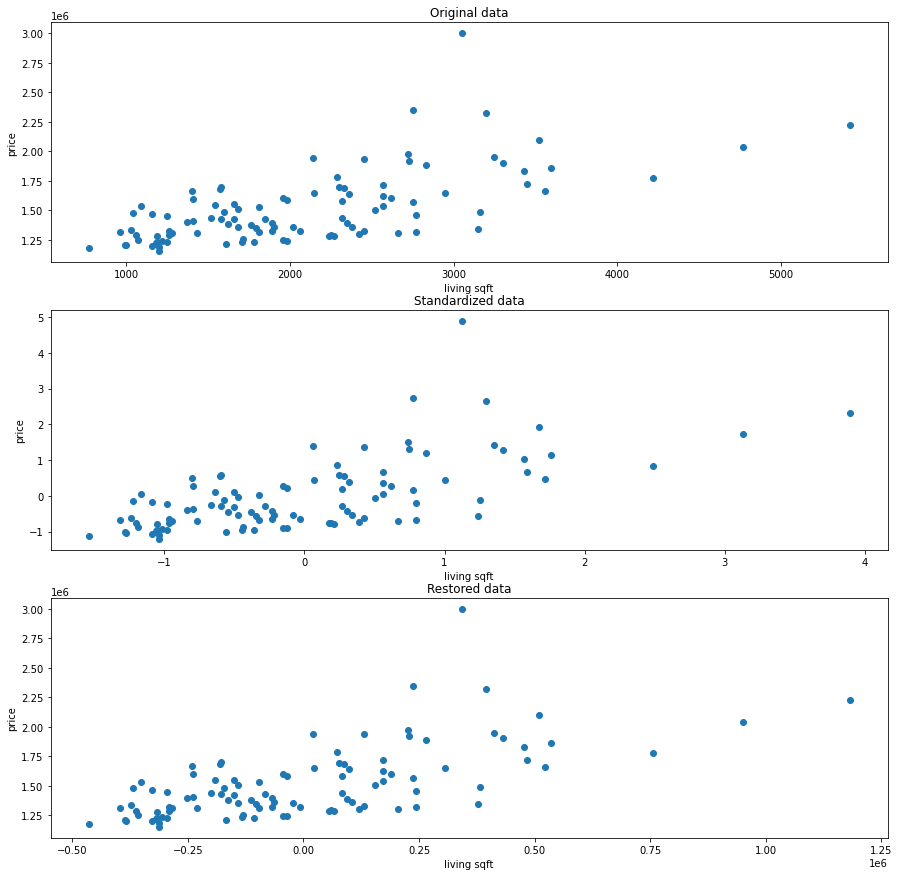

In [ ]:
#c)
# Preparing standardized data.
X_standardized,x_mean,y_std = standardize(X)
y_standardized,y_mean,y_std = standardize(y)

# Preparing destandardized data.
X_restored = destandardize(X_standardized,x_mean,y_std)
y_restored = destandardize(y_standardized,y_mean,y_std)


# Creating plots
figure, axis = plt.subplots(3,figsize=(15,15))

axis[0].scatter(X,y)
axis[0].set_title('Original data')
axis[0].set_ylabel('price')
axis[0].set_xlabel('living sqft')


axis[1].scatter(X_standardized,y_standardized)
axis[1].set_title('Standardized data')
axis[1].set_ylabel('price')
axis[1].set_xlabel('living sqft')


axis[2].scatter(X_restored,y_restored)
axis[2].set_title('Restored data')
axis[2].set_ylabel('price')
axis[2].set_xlabel('living sqft')

plt.show()

# First plot shows me original data.
# From second graph I can find out that standardized data look same as original data on the plot but they have different scale on axis x and y.
# From third plot I can see that restoring data works vell and they look same like original data. 

## 3. Gradient Descent Method

In previous examples we were determining the approximate value of optimal vector **$b$** by finding best arguments from pre-defined grid. This solution is neither fast nor precise. Although in theory it is possible to find vector **$b$** analytically, it requires inversing large matrices, as the close form for **$b$** is $b=(X^\mathsf{T}X)^{-1}X^\mathsf{T}y$.

The other approach is to find approximation of **$b$** is Gradient Descent Method. Let us recall that for function $f: \ R^n \to R$ a gradient 

$$\nabla f =  \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}$$

is the direction of the biggest increase of $f$. Using linearity of derivative, $-\nabla f$ is the direction of the biggest decrease. Gradient Descent Method is based on iterative moving in the direction opposite to gradient, and by these means approaching the minimum.

#### GDM step by step:  
1. Choose starting point $x_{0}$ and parameters: *learning rate* and *precision*,
2. Update $x_{i+1} = x_{i} - \nabla f(x_{i})\cdot lr$, where $lr$ is learning rate parameter,
3. If $(|\nabla f(x_{i})| < precision)$, end. If not, go back to point 2.

One of many limitations of GMD may be knowledge of function's gradient. Luckily for us, it is quite easy in case of linear regression with mean square error cost function. We have

$$ \nabla f_{y}(b) = \nabla\dfrac{|Xbâˆ’y|^2}{n} = \dfrac{2X^\mathsf{T}(Xbâˆ’y)}{n}.  $$

## Exercise 4
a) Create functions: *gradient()* which computes gradient for linear regresion and *gradient_descent_step()* which returns new vector **b** being the result of one GDM step.  

b) Take **$X$** consisting of *sqft_living* together with bias column. Set **$y$** as price. Standardize both **$X$** (without bias) and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 2 \end{bmatrix}$**. Experiment with other *learning rates*.  

c) Take **$X$** consisting of *sqft_living* and *sqft_lot*. Set **$y$** as price. Standardize both **$X$** and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 1 \end{bmatrix}$**. Experiment with other *learning rates*.  

d) Try to redo above points without standarization. How can you explain such results?


In [ ]:
#a)

# I created function which count function gradient.
def gradient(b, X, y):
    Xb = np.dot(X,b)
    return (np.dot(2*X.T,Xb-y))/len(y)

# I created function which count one step of gradient descent algorithm.
def gradient_descent_step(b, X, y, lr):
    return b - gradient(b,X,y)*lr


#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(gradient(test_b, test_X, test_y))
print(gradient_descent_step(test_b, test_X, test_y, 0.1))
# It works vell

[[49. ]
 [75.5]
 [90. ]]
[[-3.9 ]
 [-6.55]
 [-8.  ]]


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


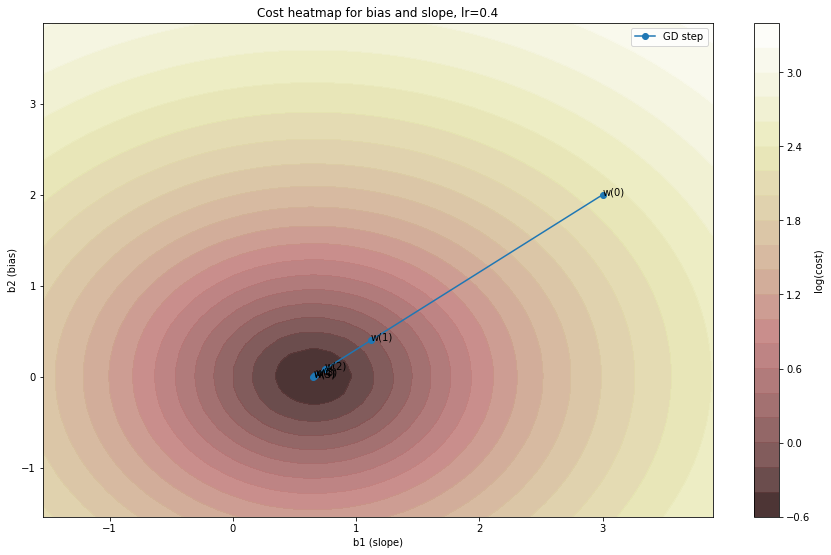

In [ ]:
#b)

# Getting data
X = house_df.sqft_living.values.reshape(-1,1)[:100]
y = house_df.price.values.reshape(-1,1)[:100]

# Standardization data
X_stand,x_mean,x_std=standardize(X)
y_stand,y_mean,y_std =standardize(y)

# Preparing cost matrix
nb_of_bs = 101  
b1 = np.linspace(np.min(X_stand), np.max(X_stand), num=nb_of_bs)  
b2 = np.linspace(np.min(X_stand), np.max(X_stand), num=nb_of_bs)  
b_x, b_y = np.meshgrid(b1, b2)  
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) 

bias_column = np.ones((100,1))
X_bias = np.hstack((X_stand,bias_column))

# Counting cost matrix
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_bias) , y_stand)



# 5 steps of gradient descent
x_b_plot = [] 
y_b_plot =[]
b = np.array([[3],[2]]) # Start value of GD
b_during_steps = []
lr = 0.4 # learning rate

x_b_plot.append(b[0][0])
y_b_plot.append(b[1][0])

# Gradient descent
for i in range(0,5):
  b = gradient_descent_step(b,X_bias,y_stand,lr)
  b_during_steps.append(b)

# Preparing values for ploot
for i in range(0,5):
   x_b_plot.append(b_during_steps[i][0])
   y_b_plot.append(b_during_steps[i][1])


# Plot
plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope, lr=0.4")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')

plt.plot(x_b_plot,y_b_plot,'-o',label='GD step')

w = ['w(0)','w(1)','w(2)','w(3)','w(4)','w(5)']

for i in range(0,6):
  plt.text(x_b_plot[i],y_b_plot[i],w[i])

plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()


# When learning rate is equal 0.2 slope and bias achive values which allow to gain the best cost function (minimal error) in 5 steps.
# After changing learning rate to 0.3 GD algorithm achive minimum after 3 steps which is better solution than before.
# When learining rate is equal 0.4 algorithm need only 2 steps.
# When learning rate is equal 0.6 or more, algorithm can't get in values close the minimum and get errors around.

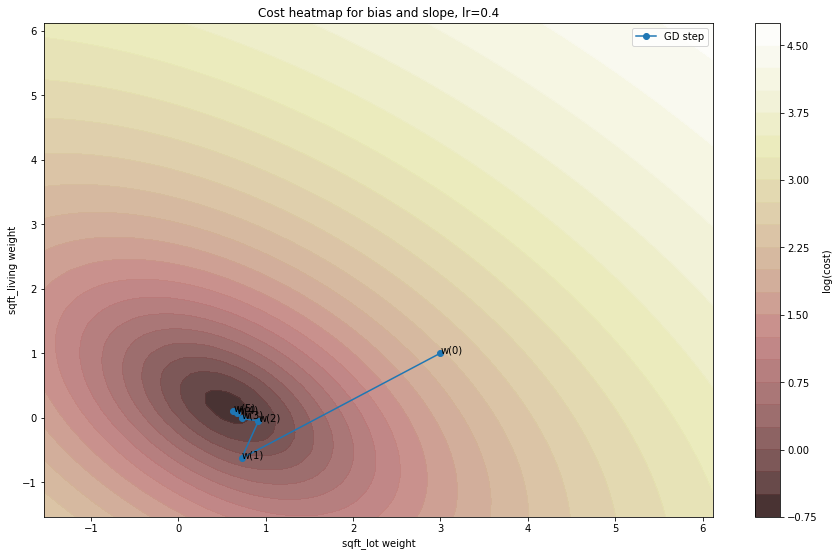

In [ ]:
#c)

X = house_df[['sqft_living','sqft_lot']].values.reshape(-1,2)[:100]
y = house_df.price.values.reshape(-1,1)[:100]

X_stand,x_mean,x_std=standardize(X)
y_stand,y_mean,y_std =standardize(y)

nb_of_bs = 101  
b1 = np.linspace(np.min(X_stand), np.max(X_stand), num=nb_of_bs)  
b2 = np.linspace(np.min(X_stand), np.max(X_stand), num=nb_of_bs)  
b_x, b_y = np.meshgrid(b1, b2)  
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) 

for i in range(nb_of_bs):
  for j in range(nb_of_bs):
    cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_stand) , y_stand)

# 5 steps of gradient descent
x_b_plot = []
y_b_plot =[]
b = np.array([[3],[1]])
b_during_steps = []
lr = 0.4

x_b_plot.append(b[0][0])
y_b_plot.append(b[1][0])

for i in range(0,5):
  b = gradient_descent_step(b,X_stand,y_stand,lr)
  b_during_steps.append(b)

for i in range(0,5):
   x_b_plot.append(b_during_steps[i][0])
   y_b_plot.append(b_during_steps[i][1])

plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope, lr=0.4")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')

plt.plot(x_b_plot,y_b_plot,'-o',label='GD step')
w = ['w(0)','w(1)','w(2)','w(3)','w(4)','w(5)']
for i in range(0,6):
  plt.text(x_b_plot[i],y_b_plot[i],w[i])

plt.xlabel("sqft_lot weight")
plt.ylabel("sqft_living weight")
plt.legend()

# According to the plot convergence to minimal error is slower than before where I had only 1 column in data.
# Plot shows that after 5 steps algorithm doesn't achive minimal error when learning rate is equal 0.2.
# After changing learning rate to 0.3 algorithm gets minimal error after 4 steps.
# So, adding new featrues to data lead to smaller convergence.
# When learining rate is equal 0.4 or more algorithm lost precision and values become more distant from minimal error

In [ ]:
#d)


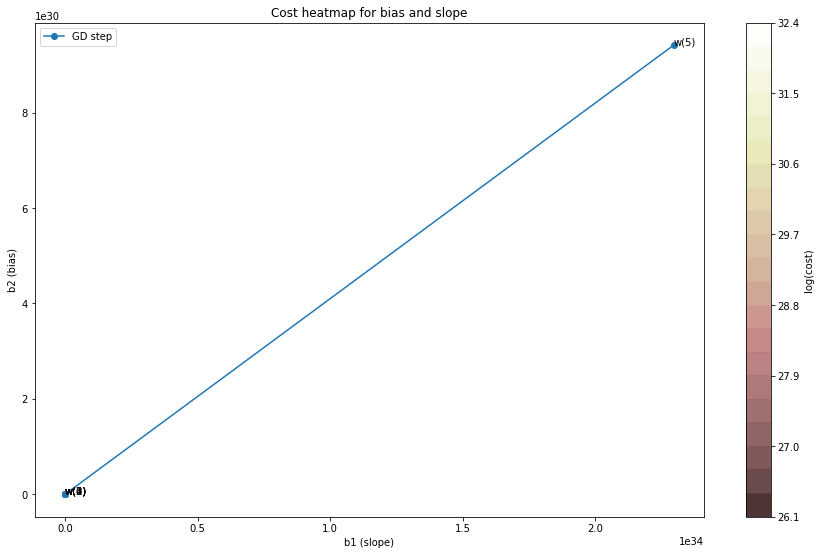

In [ ]:
#d)

X = house_df.sqft_living.values.reshape(-1,1)[:100]
y = house_df.price.values.reshape(-1,1)[:100]

nb_of_bs = 101  
b1 = np.linspace(np.min(X), np.max(X), num=nb_of_bs)  
b2 = np.linspace(np.min(X), np.max(X), num=nb_of_bs) 
b_x, b_y = np.meshgrid(b1, b2)  
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs))  

bias_column = np.ones((100,1))
X_bias = np.hstack((X,bias_column))

for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_bias) , y)

# 5 steps of gradient descent
x_b_plot = []
y_b_plot =[]
b = np.array([[3],[2]])
b_during_steps = []
lr = 0.2

x_b_plot.append(b[0][0])
y_b_plot.append(b[1][0])

for i in range(0,5):
  b = gradient_descent_step(b, X_bias,y,lr)
  b_during_steps.append(b)

for i in range(0,5):
   x_b_plot.append(b_during_steps[i][0])
   y_b_plot.append(b_during_steps[i][1])

w = ['w(0)','w(1)','w(2)','w(3)','w(4)','w(5)']


plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')

plt.plot(x_b_plot,y_b_plot,'-o',label='GD step')

for i in range(0,6):
   plt.text(x_b_plot[i],y_b_plot[i],w[i])

plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

# From the plot I can't see any useful infromation. The last step is very far from other steps.
# According to legend I have huge error for slope and bias counted during GD algorithm.
# It means that standardization is necessary for get property and clear results.
# Thanks for rescaling data algorithm works significantly better. 

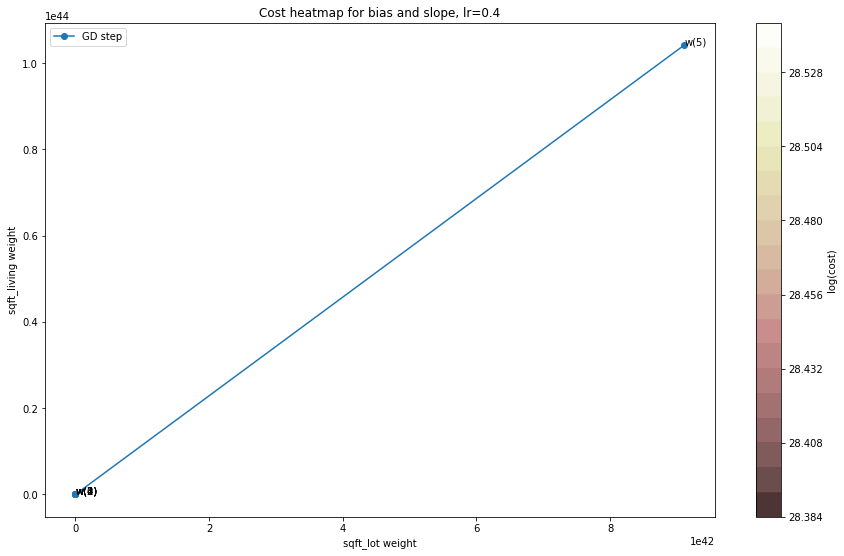

In [ ]:
# In this case problem is like above. Standardization is necessary for accurate results.

X = house_df[['sqft_living','sqft_lot']].values.reshape(-1,2)[:100]
y = house_df.price.values.reshape(-1,1)[:100]


nb_of_bs = 101 
b1 = np.linspace(np.min(X_stand), np.max(X_stand), num=nb_of_bs) 
b2 = np.linspace(np.min(X_stand), np.max(X_stand), num=nb_of_bs)
b_x, b_y = np.meshgrid(b1, b2) 
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs))

for i in range(nb_of_bs):
  for j in range(nb_of_bs):
    cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X) , y)

# 5 steps of gradient descent
x_b_plot = []
y_b_plot =[]
b = np.array([[3],[1]])
b_during_steps = []
lr = 0.4

x_b_plot.append(b[0][0])
y_b_plot.append(b[1][0])

for i in range(0,5):
  b = gradient_descent_step(b,X,y,lr)
  b_during_steps.append(b)

for i in range(0,5):
   x_b_plot.append(b_during_steps[i][0])
   y_b_plot.append(b_during_steps[i][1])

plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope, lr=0.4")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')

plt.plot(x_b_plot,y_b_plot,'-o',label='GD step')
w = ['w(0)','w(1)','w(2)','w(3)','w(4)','w(5)']
for i in range(0,6):
  plt.text(x_b_plot[i],y_b_plot[i],w[i])

plt.xlabel("sqft_lot weight")
plt.ylabel("sqft_living weight")
plt.legend()